In [5]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('/users/josquin1/Documents/Dropbox/CNRS-CR2/softwares/fgbuster/')
from fgbuster.pysm_helpers import get_instrument, get_sky
import healpy as hp
import numpy as np
from fgbuster.xForecast import xForecast

nside = 16
# define sky and foregrounds simulations
sky = get_sky(nside, 'd0s0')
# define instrument
instrument = get_instrument(nside, 'litebird')
# get noiseless frequency maps
freq_maps = instrument.observe(sky, write_outputs=False)[0]
# take only the Q and U maps
freq_maps = freq_maps[:,1:]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
nu (GHz) | sigma_I (uK_CMB amin) | sigma_P (uK_CMB amin) | FWHM (arcmin) 

0040.00 | 25.60 | 36.10 | 00.00 
0050.00 | 13.90 | 19.60 | 00.00 
0060.00 | 14.33 | 20.20 | 00.00 
0068.40 | 08.01 | 11.30 | 00.00 
0078.00 | 07.30 | 10.30 | 00.00 
0088.50 | 05.96 | 08.40 | 00.00 
0100.00 | 04.96 | 07.00 | 00.00 
0118.90 | 04.11 | 05.80 | 00.00 
0140.00 | 03.33 | 04.70 | 00.00 
0166.00 | 04.96 | 07.00 | 00.00 
0195.00 | 04.11 | 05.80 | 00.00 
0234.90 | 05.67 | 08.00 | 00.00 
0280.00 | 06.45 | 09.10 | 00.00 
0337.40 | 08.09 | 11.40 | 00.00 
0402.10 | 13.90 | 19.60 | 00.00 
Instrument attribute 'pixel_indices' not set.


In [6]:
# define components used in the modeling
from fgbuster.component_model import CMB, Dust, Synchrotron
components = [CMB(), Dust(350.), Synchrotron(20.)]

('fsky = ', 1.0)
======= ESTIMATION OF SPECTRAL PARAMETERS =======
('res.x = ', array([ 1.54, 20.  , -3.  ]))
======= ESTIMATION OF NOISE AFTER COMP SEP =======
======= COMPUTATION OF CL_FGS =======
======= ESTIMATION OF STAT AND SYS RESIDUALS =======
======= OPTIMIZATION OF COSMO LIKELIHOOD =======
('bounds on r = ', 0.000868511373751353, ' / ', 0.0013894954943731374)
('starting point = ', 0.0010985411419875584)
('    ===>> fitted r = ', array([0.001]))
======= ESTIMATION OF SIGMA(R) =======
('ind_sr_min = ', 1)
('sr_grid[ind_sr_min-1] = ', 0.0009999963934700996)
('sr_grid[ind_sr_min+1] = ', 0.001778273531071665)
('sr_grid = ', array([9.99996393e-04, 1.33351682e-03, 1.77827353e-03, 2.37136622e-03,
       3.16226816e-03, 4.21695299e-03, 5.62339804e-03, 7.49892294e-03,
       9.99997596e-03, 1.33351843e-02, 1.77827567e-02, 2.37136907e-02,
       3.16227196e-02, 4.21695806e-02, 5.62340480e-02, 7.49893195e-02,
       9.99998798e-02, 1.33352003e-01, 1.77827781e-01, 2.37137192e-01,
       3

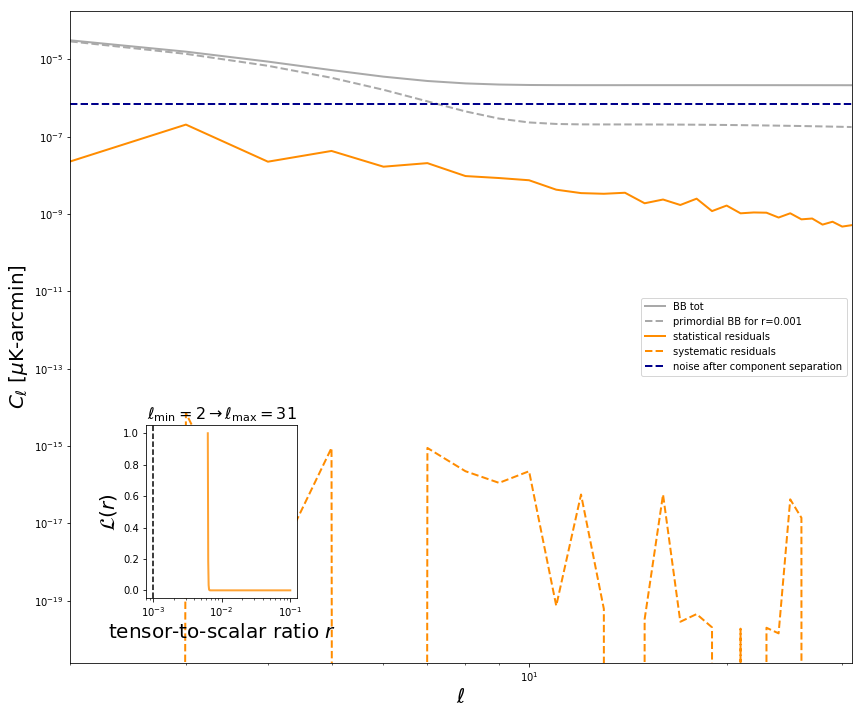

In [7]:
# call for xForecast
# with lmin=2, lmax=2*nside-1, and Alens=0.6
# you can try with make_figure=True if you want to output angular power spectra and profile likelihood on r
res = xForecast(components, instrument, freq_maps, 2, 2*nside-1, 1.0, make_figure=True)